In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras.layers import Input

from keras.layers import BatchNormalization
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing.image import load_img
import numpy as np
from numpy import genfromtxt
import cv2
from sklearn.model_selection import train_test_split


physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
#shuffler
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [ ]:
X_Dat=[]

from google.colab import drive
drive.mount('/content/drive')


for i in range(100): 
  daty = genfromtxt("/content/drive/My Drive/Colab Notebooks/CNN_LSTM_COVID/Input/dat"+str(i+1)+".csv", delimiter=',')# My reference Image
  X_Dat.append(daty[:,:])

X_datnew=np.asarray(X_Dat)

X=X_datnew


##################################################################################

Y=np.zeros((100,9))

for i in range(100):
  my_data = genfromtxt("/content/drive/My Drive/Colab Notebooks/CNN_LSTM_COVID/Labels/lab"+str(i+1)+".csv", delimiter=',')
  Y[i,:]=my_data
    
    
###################################################################################

#Random Shuffling
X,Y=unison_shuffled_copies(X, Y)

# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)

# Train

X_train = X[:split_train, :]; y_train=Y[:split_train, :]

# Valid

X_valid = X[split_train:split_valid,:]; y_valid=Y[split_train:split_valid,:]

# Test

X_test = X[split_valid:,:]; y_test=Y[split_valid:,:]

   
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(70, 201, 9) (70, 9)
(20, 201, 9) (20, 9)
(10, 201, 9) (10, 9)


**1DCNN-LSTM**

In [ ]:
#Model Descirption
#############################################################################################    

seq = Sequential()
seq.add(Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[201, 9]))
seq.add(MaxPooling1D())

seq.add(Conv1D(filters=64, kernel_size=5,
                      strides=1,
                      activation="relu"))
seq.add(MaxPooling1D())
seq.add(Conv1D(filters=128, kernel_size=5,
                      strides=1,
                      activation="relu"))
seq.add(MaxPooling1D())
seq.add(Conv1D(filters=64, kernel_size=5,
                      strides=1,
                      activation="relu"))
seq.add(MaxPooling1D())

seq.add(BatchNormalization())
seq.add(LSTM(120, return_sequences=True))
seq.add(LSTM(120, return_sequences=True))
seq.add(LSTM(120, return_sequences=True))

seq.add(Flatten())
seq.add(Dense(9))
seq.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_38 (Conv1D)          (None, 201, 32)           1472      
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 100, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_39 (Conv1D)          (None, 96, 64)            10304     
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 48, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_40 (Conv1D)          (None, 44, 128)           41088     
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 22, 128)        

In [ ]:
seq.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history=seq.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 [==============================] - 5s 516ms/step - loss: 0.8346 - accuracy: 0.1714 - val_loss: 1.1678 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 0.3843 - accuracy: 0.2857 - val_loss: 1.6693 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2760 - accuracy: 0.3571 - val_loss: 1.6630 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2059 - accuracy: 0.3429 - val_loss: 1.6312 - val_accuracy: 0.1000
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2100 - accuracy: 0.3429 - val_loss: 1.7917 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.1838 - accuracy: 0.3714 - val_loss: 1.7388 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.1765 - accuracy: 0.3714 - val_loss: 1.5650 - val_accuracy: 0.0000

Text(0.5, 1.0, 'Training and validation loss')

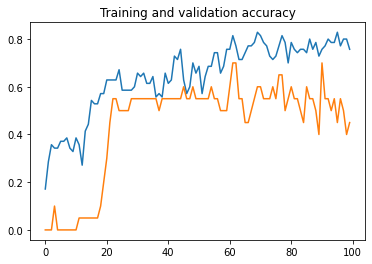

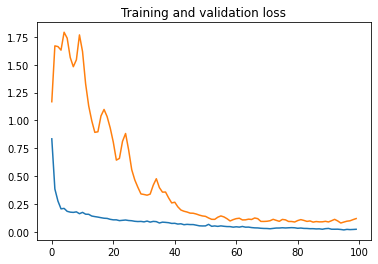

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

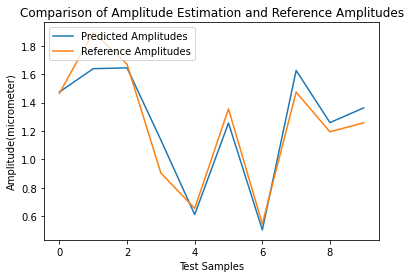

In [ ]:
y_predictim=seq.predict(X_test)


plt.plot(y_predictim[:,0],label="Predicted Amplitudes")
plt.plot(y_test[:,0],label="Reference Amplitudes")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(micrometer)')
plt.title('Comparison of Amplitude Estimation and Reference Amplitudes')
plt.show()

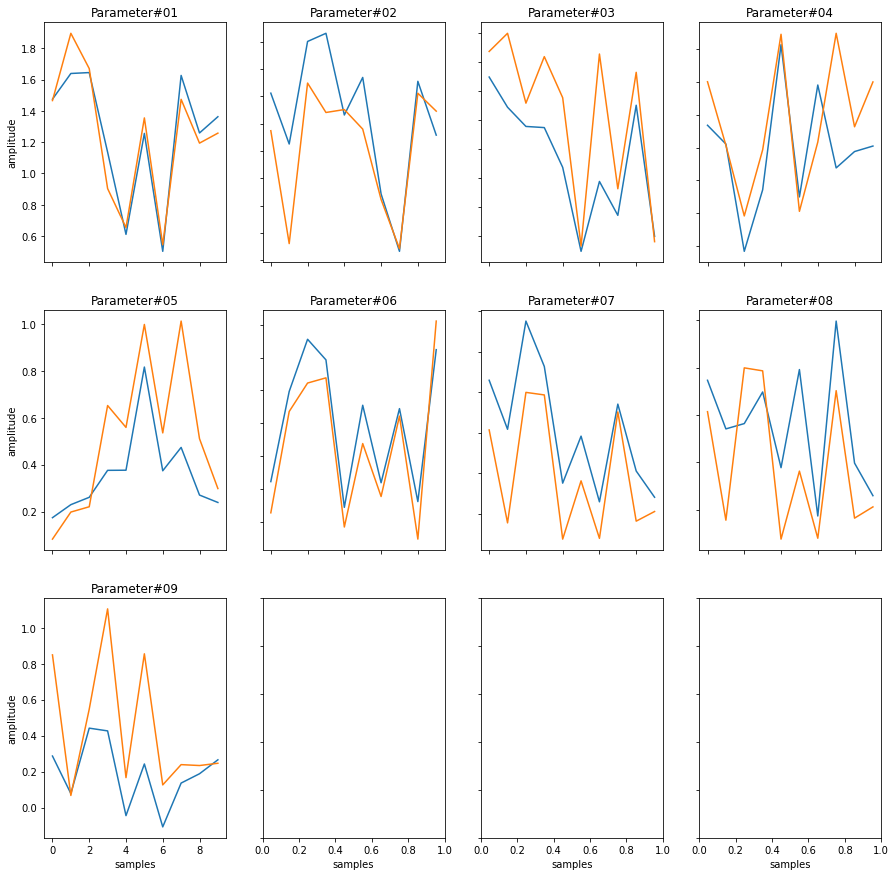

In [ ]:
fig, axs = plt.subplots(3, 4,figsize=(15,15))

axs[0, 0].plot(y_predictim[:,0],label="Predicted Amplitudes")
axs[0,0].plot(y_test[:,0],label="Reference Amplitudes")
axs[0, 0].set_title('Parameter#01')
axs[0, 1].plot(y_predictim[:,1],label="Predicted Amplitudes")
axs[0,1].plot(y_test[:,1],label="Reference Amplitudes")
axs[0, 1].set_title('Parameter#02')
axs[0, 2].plot(y_predictim[:,2],label="Predicted Amplitudes")
axs[0,2].plot(y_test[:,2],label="Reference Amplitudes")
axs[0,2].set_title('Parameter#03')
axs[0, 3].plot(y_predictim[:,3],label="Predicted Amplitudes")
axs[0,3].plot(y_test[:,3],label="Reference Amplitudes")
axs[0,3].set_title('Parameter#04')
axs[1, 0].plot(y_predictim[:,4],label="Predicted Amplitudes")
axs[1,0].plot(y_test[:,4],label="Reference Amplitudes")
axs[1, 0].set_title('Parameter#05')
axs[1, 1].plot(y_predictim[:,5],label="Predicted Amplitudes")
axs[1,1].plot(y_test[:,5],label="Reference Amplitudes")
axs[1, 1].set_title('Parameter#06')
axs[1, 2].plot(y_predictim[:,6],label="Predicted Amplitudes")
axs[1,2].plot(y_test[:,6],label="Reference Amplitudes")
axs[1, 2].set_title('Parameter#07')
axs[1, 3].plot(y_predictim[:,7],label="Predicted Amplitudes")
axs[1,3].plot(y_test[:,6],label="Reference Amplitudes")
axs[1,3].set_title('Parameter#08')
axs[2, 0].plot(y_predictim[:,8],label="Predicted Amplitudes")
axs[2,0].plot(y_test[:,7],label="Reference Amplitudes")
axs[2,0].set_title('Parameter#09')


for ax in axs.flat:
    ax.set(xlabel='samples', ylabel='amplitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()